we try ensemble learning (we use all algorithm)
bagging and boosting
- bagging(pallel process)
- boosting(serial process)
- RANDOM FOREST(bagging algo(add many decision trees))



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [7]:
px.scatter_3d(df,x='Paleonium',y='Pressure',z='Price')

In [8]:
#feature selection
X=df[['Paleonium','Pressure']]
y=df[['Price']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=True)

In [9]:
#algo instantiate
model=RandomForestRegressor(max_depth=25)
model.fit(xtrain,ytrain)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5648\3935279864.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=25)

In [10]:
print("score:",model.score(xtest,ytest)*100)
pred=model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mse:",mean_absolute_error(y,pred))

score: 97.99838289292178
mse: 2779.909252738907
mse: 35.48587056543351


<AxesSubplot:ylabel='Density'>

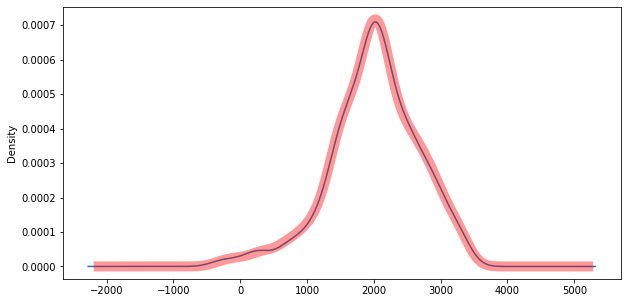

In [11]:
#visualization
df['p1']=pred
ax=df['Price'].plot(kind='kde',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,alpha=.4,color='red',linewidth=10)

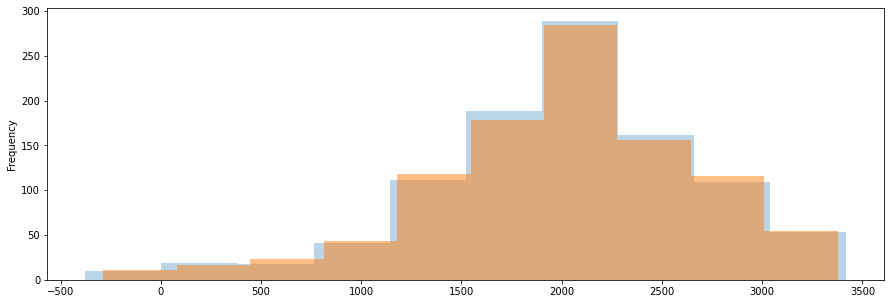

In [12]:
ax=df['Price'].plot(kind='hist',figsize=(15,5),alpha=.3)
df['p1'].plot(kind='hist',ax=ax,figsize=(15,5),alpha=.5)

plt.show()

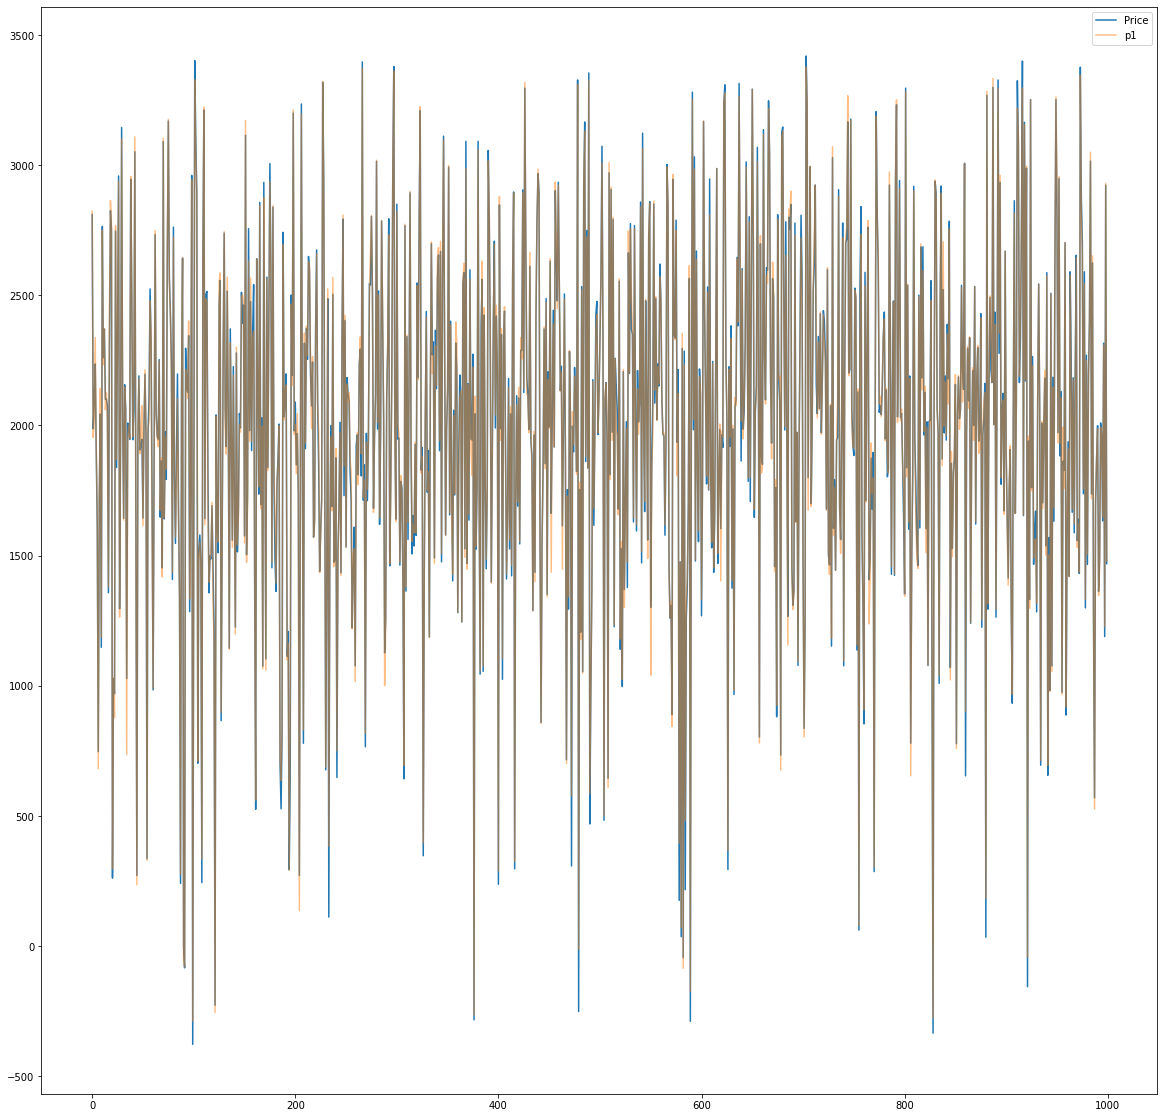

In [13]:
ax=df['Price'].plot(kind='line',figsize=(15,20),)
df['p1'].plot(kind='line',ax=ax,figsize=(20,20),alpha=.5)
plt.legend()
plt.show()

In [14]:
dump(model,"diamond_random_forest.pkl")

['diamond_random_forest.pkl']